<a href="https://colab.research.google.com/github/Pedro-Ortega-G/TAM/blob/main/regresiones_5folds_5_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo usando pandas (asumiendo que está en el entorno actual)
df = pd.read_csv('2023_nba_player_stats.csv')

# Muestra las primeras filas del DataFrame para verificar
#df.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel # Import DotProduct and WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error




In [ ]:
X = df[['PTS', 'REB', 'AST','OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%'
]]  # Ejemplo: usando puntos, rebotes, asistencias y las otras variables como predictoras
y = df['Min']  # Ejemplo: usando minutos de juego por temporada como variable objetivo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para entrenar, 20% para probar

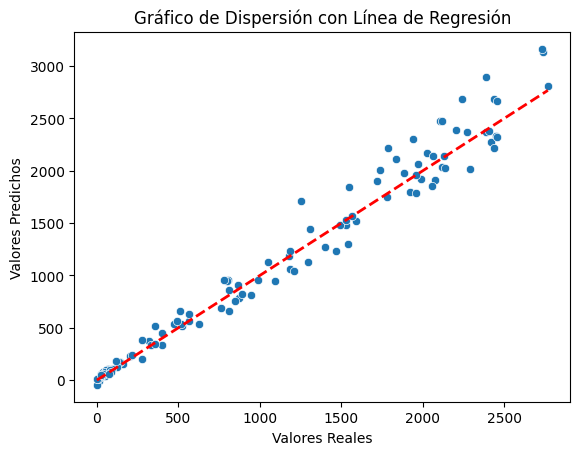

MAE Linear Regresion: 113.37398453278567


In [ ]:
#crear y entrenar modelo de regresión lineal
modelo_LR = LinearRegression()         #modelo linear de regresion
modelo_LR.fit(X_train, y_train)        #aplica el modelo sobre el set de datos
y_pred_LR = modelo_LR.predict(X_test)  #predice salidas
# Gráfico de dispersión para los datos de prueba
sns.scatterplot(x=y_test, y=y_pred_LR)

# Línea de regresión
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal (ideal)

plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Dispersión con Línea de Regresión")

plt.show()

# Calcula el MAE
mae_LR = mean_absolute_error(y_test, y_pred_LR)

# Imprime el MAE
print(f"MAE Linear Regresion: {mae_LR}")

In [ ]:

# Crea el modelo de regresión lineal
modelo = LinearRegression()

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # shuffle=True para aleatorizar los datos

# Realiza la validación cruzada y obtén los puntajes MAE
scores = cross_val_score(modelo, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_LR = -scores

# Imprime los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_LR)

# Calcula e imprime el MAE promedio
mae_promedio_LR = mae_scores_LR.mean()
print(f"MAE promedio Linear Regresion (5 folds): {mae_promedio_LR}")

Puntajes MAE para cada fold: [113.37398453 121.76471334  99.90271112 110.42520135  96.50169406]
MAE promedio Linear Regresion (5 folds): 108.39366087927401


In [ ]:
# Define el modelo
modelo_cv_LR = LinearRegression()

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results = {}
for metric_name, scoring in scoring_metrics.items():
    scores_LR = cross_val_score(modelo_cv_LR, X, y, scoring=scoring, cv=cv)
    results[metric_name] = scores_LR

# Procesa los resultados
mse_scores_LR = -results['neg_mean_squared_error']  # Convertir a positivo
r2_scores_LR = results['r2']
mape_scores_LR = -results['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold Linear Regresion:", mse_scores_LR)
print("MSE promedio Linear Regresion:", mse_scores_LR.mean())
print("Desviación estándar del MSE Linear Regresion:", mse_scores_LR.std())

print("\nPuntajes R2 para cada fold Linear Regresion:", r2_scores_LR)
print("R2 promedio Linear Regresion:", r2_scores_LR.mean())

print("\nPuntajes MAPE para cada fold:", mape_scores_LR)
print("MAPE promedio:", mape_scores_LR.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_cv_LR.fit(X_train, y_train)
y_pred_cv_LR = modelo_cv_LR.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_cv_LR = mean_absolute_error(y_test, y_pred)
mse_test_cv_LR = mean_squared_error(y_test, y_pred)
r2_test_cv_LR = r2_score(y_test, y_pred)
mape_test_cv_LR = mean_absolute_percentage_error(y_test, y_pred)

print("\n--- Datos de prueba ---")
print("MAE validacion cruzada Linear Regresion:", mae_test_cv_LR)
print("MSE validacion cruzada Linear Regresion:", mse_test_cv_LR)
print("R2 validacion cruzada Linear Regresion:", r2_test_cv_LR)
print("MAPE validacion cruzada Linear Regresion:", mape_test_cv_LR)

Puntajes MSE para cada fold Linear Regresion: [26838.62975474 28277.29218732 21947.34117707 29768.52618208
 22282.64847005]
MSE promedio Linear Regresion: 25822.887554250578
Desviación estándar del MSE Linear Regresion: 3167.871556647782

Puntajes R2 para cada fold Linear Regresion: [0.96431854 0.9593268  0.96276306 0.95898121 0.96504451]
R2 promedio Linear Regresion: 0.9620868251608442

Puntajes MAPE para cada fold: [0.43847535 0.22933049 0.16411855 0.22533334 0.3971908 ]
MAPE promedio: 0.290889705414365

--- Datos de prueba ---
MAE validacion cruzada Linear Regresion: 774.2292849857223
MSE validacion cruzada Linear Regresion: 755097.5964857772
R2 validacion cruzada Linear Regresion: -0.0038881731407078846
MAPE validacion cruzada Linear Regresion: 20.301584651595707


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(


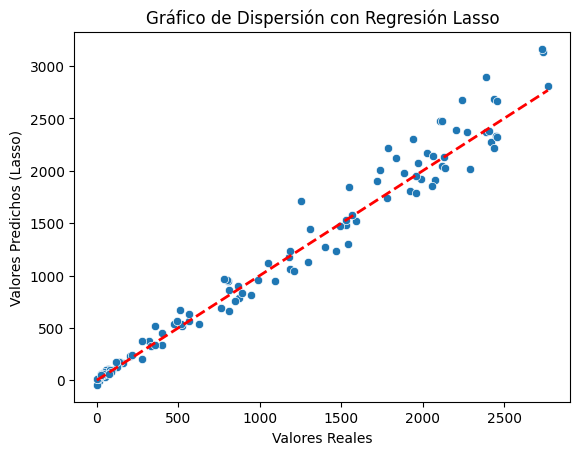

MAE Lasso: 113.39772155974212


In [ ]:
# Crear y entrenar el modelo Lasso
modelo_lasso = Lasso(alpha=1.0)  # Puedes ajustar el valor de 'alpha' (regularización)
modelo_lasso.fit(X_train, y_train)

# Hacer predicciones con el modelo Lasso
y_pred_lasso = modelo_lasso.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (Lasso)")
plt.title("Gráfico de Dispersión con Regresión Lasso")
plt.show()

# Calcular e imprimir el MAE para el modelo Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MAE Lasso: {mae_lasso}")

In [ ]:
# Crea el modelo Lasso
modelo_lasso = Lasso(alpha=1.0)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y obtén los puntajes MAE
scores = cross_val_score(modelo_lasso, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_Lasso = -scores

# Imprime los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_Lasso)

# Calcula e imprime el MAE promedio
mae_promedio_Lasso = mae_scores_Lasso.mean()
print(f"MAE promedio Lasso (5 folds): {mae_promedio_Lasso}")

Puntajes MAE para cada fold: [113.39772156 120.16692455  99.92856738 110.34956469  96.12168389]
MAE promedio Lasso (5 folds): 107.99289241285055


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.875e+06, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.808e+06, tolerance: 3.040e

In [ ]:
# Define el modelo Lasso con alpha=1
modelo_lasso = Lasso(alpha=1.0)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_lasso = {}
for metric_name, scoring in scoring_metrics.items():
    scores_lasso = cross_val_score(modelo_lasso, X, y, scoring=scoring, cv=cv)
    results_lasso[metric_name] = scores_lasso

# Procesa los resultados
mse_scores_lasso = -results_lasso['neg_mean_squared_error']  # Convertir a positivo
r2_scores_lasso = results_lasso['r2']
mape_scores_lasso = -results_lasso['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (Lasso):", mse_scores_lasso)
print("MSE promedio (Lasso):", mse_scores_lasso.mean())
print("Desviación estándar del MSE (Lasso):", mse_scores_lasso.std())

print("\nPuntajes R2 para cada fold (Lasso):", r2_scores_lasso)
print("R2 promedio (Lasso):", r2_scores_lasso.mean())

print("\nPuntajes MAPE para cada fold (Lasso):", mape_scores_lasso)
print("MAPE promedio (Lasso):", mape_scores_lasso.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_test_lasso = r2_score(y_test, y_pred_lasso)
mape_test_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

print("\n--- Datos de prueba (Lasso) ---")
print("MAE (Lasso):", mae_test_lasso)
print("MSE (Lasso):", mse_test_lasso)
print("R2 (Lasso):", r2_test_lasso)
print("MAPE (Lasso):", mape_test_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.875e+06, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.808e+06, tolerance: 3.040e

Puntajes MSE para cada fold (Lasso): [26700.16215796 27646.56368969 21944.09938081 29752.43883365
 22129.29362844]
MSE promedio (Lasso): 25634.511538112063
Desviación estándar del MSE (Lasso): 3099.902733979768

Puntajes R2 para cada fold (Lasso): [0.96450263 0.96023402 0.96276856 0.95900338 0.96528509]
R2 promedio (Lasso): 0.9623587353122947

Puntajes MAPE para cada fold (Lasso): [0.43270185 0.21107486 0.1648599  0.22415005 0.39327443]
MAPE promedio (Lasso): 0.2852122186351628

--- Datos de prueba (Lasso) ---
MAE (Lasso): 113.39772155974212
MSE (Lasso): 26700.162157963667
R2 (Lasso): 0.9645026323271794
MAPE (Lasso): 0.4327018523556693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.331e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.875e+06, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.808e+06, tolerance: 3.040e

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.794e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(


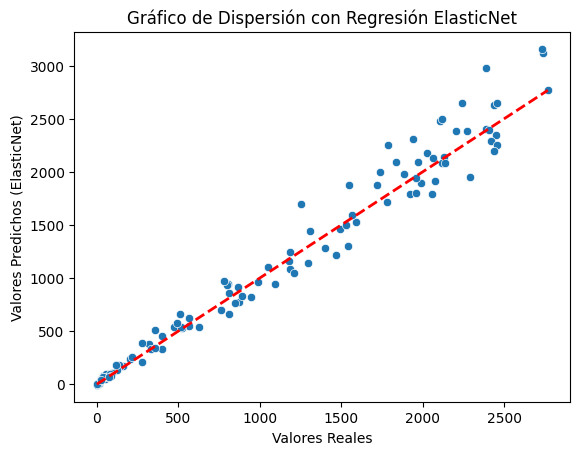

MAE ElasticNet: 113.9179888038722


In [ ]:
# Crear y entrenar el modelo ElasticNet
modelo_elasticnet = ElasticNet(alpha=10.0, l1_ratio=0.5)  # Puedes ajustar alpha y l1_ratio
modelo_elasticnet.fit(X_train, y_train)

# Hacer predicciones con el modelo ElasticNet
y_pred_elasticnet = modelo_elasticnet.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_elasticnet)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (ElasticNet)")
plt.title("Gráfico de Dispersión con Regresión ElasticNet")
plt.show()

# Calcular e imprimir el MAE para el modelo ElasticNet
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
print(f"MAE ElasticNet: {mae_elasticnet}")

In [ ]:
# Create the ElasticNet model
modelo_elasticnet = ElasticNet(alpha=10.0, l1_ratio=0.5)

# Define the 5-fold cross-validation scheme
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get MAE scores for each fold
scores = cross_val_score(modelo_elasticnet, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Convert negative scores to positive MAE values
mae_scores_ElasticNet = -scores

# Print MAE scores for each fold
print("Puntajes MAE para cada fold:", mae_scores_ElasticNet)

# Calculate and print the average MAE across all folds
mae_promedio_ElasticNet = mae_scores_ElasticNet.mean()
print(f"MAE promedio Elastic Net (5 folds): {mae_promedio_ElasticNet}")

Puntajes MAE para cada fold: [113.9179888  118.64314357 100.92195593 109.59078776  97.09692445]
MAE promedio Elastic Net (5 folds): 108.03416010193666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.794e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.844e+06, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+06, tolerance: 3.040e

In [ ]:
# Define el modelo ElasticNet con alpha=10.0 y l1_ratio=0.5
modelo_elasticnet = ElasticNet(alpha=10.0, l1_ratio=0.5)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_elasticnet = {}
for metric_name, scoring in scoring_metrics.items():
    scores_elasticnet = cross_val_score(modelo_elasticnet, X, y, scoring=scoring, cv=cv)
    results_elasticnet[metric_name] = scores_elasticnet

# Procesa los resultados
mse_scores_elasticnet = -results_elasticnet['neg_mean_squared_error']  # Convertir a positivo
r2_scores_elasticnet = results_elasticnet['r2']
mape_scores_elasticnet = -results_elasticnet['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (ElasticNet):", mse_scores_elasticnet)
print("MSE promedio (ElasticNet):", mse_scores_elasticnet.mean())
print("Desviación estándar del MSE (ElasticNet):", mse_scores_elasticnet.std())

print("\nPuntajes R2 para cada fold (ElasticNet):", r2_scores_elasticnet)
print("R2 promedio (ElasticNet):", r2_scores_elasticnet.mean())

print("\nPuntajes MAPE para cada fold (ElasticNet):", mape_scores_elasticnet)
print("MAPE promedio (ElasticNet):", mape_scores_elasticnet.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_elasticnet.fit(X_train, y_train)
y_pred_elasticnet = modelo_elasticnet.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_test_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_test_elasticnet = r2_score(y_test, y_pred_elasticnet)
mape_test_elasticnet = mean_absolute_percentage_error(y_test, y_pred_elasticnet)

print("\n--- Datos de prueba (ElasticNet) ---")
print("MAE (ElasticNet):", mae_test_elasticnet)
print("MSE (ElasticNet):", mse_test_elasticnet)
print("R2 (ElasticNet):", r2_test_elasticnet)
print("MAPE (ElasticNet):", mape_test_elasticnet)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.794e+06, tolerance: 2.871e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.844e+06, tolerance: 2.931e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+06, tolerance: 3.040e

Puntajes MSE para cada fold (ElasticNet): [27777.79347126 27628.93925031 22179.37498493 29607.84028494
 21803.55879305]
MSE promedio (ElasticNet): 25799.501356896042
Desviación estándar del MSE (ElasticNet): 3188.6298000545803

Puntajes R2 para cada fold (ElasticNet): [0.96306994 0.96025937 0.96236938 0.95920263 0.96579608]
R2 promedio (ElasticNet): 0.9621394784744064

Puntajes MAPE para cada fold (ElasticNet): [0.21012166 0.18808168 0.15396181 0.19997226 0.3417517 ]
MAPE promedio (ElasticNet): 0.21877782188214506

--- Datos de prueba (ElasticNet) ---
MAE (ElasticNet): 113.9179888038722
MSE (ElasticNet): 27777.79347125895
R2 (ElasticNet): 0.9630699415922889
MAPE (ElasticNet): 0.21012165551891304


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+06, tolerance: 3.040e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+06, tolerance: 2.899e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.116e+06, tolerance: 2.998e

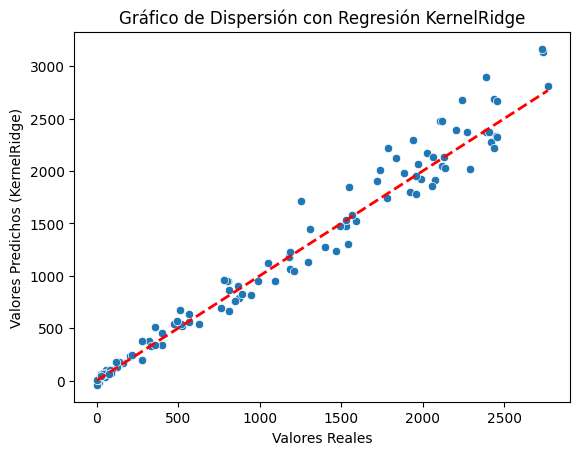

MAE KernelRidge: 113.3459423086117


In [ ]:
# Crear y entrenar el modelo KernelRidge
modelo_kernelridge = KernelRidge(alpha=10, kernel='linear')  # Puedes ajustar alpha y el kernel
modelo_kernelridge.fit(X_train, y_train)

# Hacer predicciones con el modelo KernelRidge
y_pred_kernelridge = modelo_kernelridge.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_kernelridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (KernelRidge)")
plt.title("Gráfico de Dispersión con Regresión KernelRidge")
plt.show()

# Calcular e imprimir el MAE para el modelo KernelRidge
mae_kernelridge = mean_absolute_error(y_test, y_pred_kernelridge)
print(f"MAE KernelRidge: {mae_kernelridge}")

In [ ]:

# Crear el modelo KernelRidge
modelo_kernelridge = KernelRidge(alpha=10, kernel='linear')

# Definir el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # shuffle=True para aleatorizar los datos

# Realizar la validación cruzada y obtener los puntajes MAE
scores = cross_val_score(modelo_kernelridge, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_KernelRidge = -scores

# Imprimir los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_KernelRidge)

# Calcular e imprimir el MAE promedio
mae_promedio_KernelRidge = mae_scores_KernelRidge.mean()
print(f"MAE promedio Kernel Ridge(5 folds): {mae_promedio_KernelRidge}")

Puntajes MAE para cada fold: [113.34594229 120.68942549  99.85813232 110.40712333  95.95812425]
MAE promedio Kernel Ridge(5 folds): 108.0517495360048


In [ ]:
# Define el modelo KernelRidge con alpha=10 y kernel='linear'
modelo_kernelridge = KernelRidge(alpha=10, kernel='linear')

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_kernelridge = {}
for metric_name, scoring in scoring_metrics.items():
    scores_kernelridge = cross_val_score(modelo_kernelridge, X, y, scoring=scoring, cv=cv)
    results_kernelridge[metric_name] = scores_kernelridge

# Procesa los resultados
mse_scores_kernelridge = -results_kernelridge['neg_mean_squared_error']  # Convertir a positivo
r2_scores_kernelridge = results_kernelridge['r2']
mape_scores_kernelridge = -results_kernelridge['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (KernelRidge):", mse_scores_kernelridge)
print("MSE promedio (KernelRidge):", mse_scores_kernelridge.mean())
print("Desviación estándar del MSE (KernelRidge):", mse_scores_kernelridge.std())

print("\nPuntajes R2 para cada fold (KernelRidge):", r2_scores_kernelridge)
print("R2 promedio (KernelRidge):", r2_scores_kernelridge.mean())

print("\nPuntajes MAPE para cada fold (KernelRidge):", mape_scores_kernelridge)
print("MAPE promedio (KernelRidge):", mape_scores_kernelridge.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_kernelridge.fit(X_train, y_train)
y_pred_kernelridge = modelo_kernelridge.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_kernelridge = mean_absolute_error(y_test, y_pred_kernelridge)
mse_test_kernelridge = mean_squared_error(y_test, y_pred_kernelridge)
r2_test_kernelridge = r2_score(y_test, y_pred_kernelridge)
mape_test_kernelridge = mean_absolute_percentage_error(y_test, y_pred_kernelridge)

print("\n--- Datos de prueba (KernelRidge) ---")
print("MAE (KernelRidge):", mae_test_kernelridge)
print("MSE (KernelRidge):", mse_test_kernelridge)
print("R2 (KernelRidge):", r2_test_kernelridge)
print("MAPE (KernelRidge):", mape_test_kernelridge)

Puntajes MSE para cada fold (KernelRidge): [26760.3251372  27847.62803192 21939.77293784 29741.98990263
 22147.56975931]
MSE promedio (KernelRidge): 25687.45715377981
Desviación estándar del MSE (KernelRidge): 3125.141900522922

Puntajes R2 para cada fold (KernelRidge): [0.96442265 0.95994481 0.9627759  0.95901778 0.96525642]
R2 promedio (KernelRidge): 0.9622835108183228

Puntajes MAPE para cada fold (KernelRidge): [0.33229208 0.21997862 0.16646694 0.23281773 0.34621088]
MAPE promedio (KernelRidge): 0.25955325076125496

--- Datos de prueba (KernelRidge) ---
MAE (KernelRidge): 113.3459423086117
MSE (KernelRidge): 26760.32514351871
R2 (KernelRidge): 0.9644226467598294
MAPE (KernelRidge): 0.3322920818154975


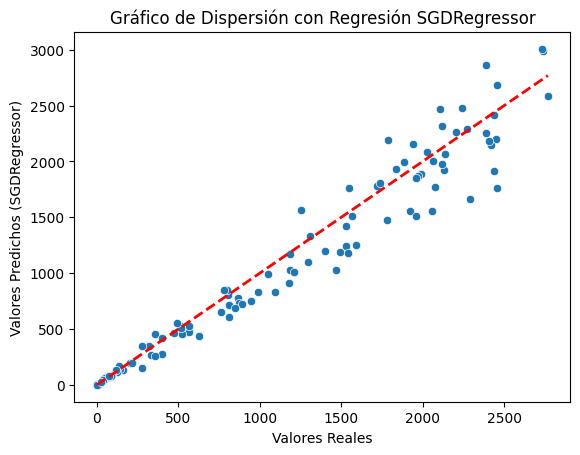

MAE SGDRegressor: 141.6224092194684


In [ ]:
# Crear y entrenar el modelo SGDRegressor
modelo_sgd = SGDRegressor(loss='huber', alpha=0.01, random_state=42) # Puedes ajustar la pérdida, alpha, etc.
modelo_sgd.fit(X_train, y_train)

# Hacer predicciones con el modelo SGDRegressor
y_pred_sgd = modelo_sgd.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_sgd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (SGDRegressor)")
plt.title("Gráfico de Dispersión con Regresión SGDRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo SGDRegressor
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print(f"MAE SGDRegressor: {mae_sgd}")

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SGDRegressor
modelo_sgd = SGDRegressor(loss='huber', alpha=0.01, random_state=42)

# Definir el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los puntajes MAE
scores = cross_val_score(modelo_sgd, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_SGDRegressor = -scores

# Imprimir los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_SGDRegressor)

# Calcular e imprimir el MAE promedio
mae_promedio_SGDRegressor = mae_scores_SGDRegressor.mean()
print(f"MAE promedio SGDRegressor(5 folds): {mae_promedio_SGDRegressor}")

# (Opcional) Entrenar el modelo con todos los datos y evaluar en el conjunto de prueba
modelo_sgd.fit(X, y)  # Entrenar con todos los datos
y_pred_sgd = modelo_sgd.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_sgd)
print(f"MAE en el conjunto de prueba SGDRegressor: {mae_test}")

Puntajes MAE para cada fold: [287.72484072 162.57626471 197.35842185 154.21839566 519.47175264]
MAE promedio SGDRegressor(5 folds): 264.2699351153845
MAE en el conjunto de prueba SGDRegressor: 286.22052976967706


In [ ]:
# Define el modelo SGDRegressor con los parámetros especificados
modelo_sgd = SGDRegressor(loss='huber', alpha=0.01, random_state=42)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_sgd = {}
for metric_name, scoring in scoring_metrics.items():
    scores_sgd = cross_val_score(modelo_sgd, X, y, scoring=scoring, cv=cv)
    results_sgd[metric_name] = scores_sgd

# Procesa los resultados
mse_scores_sgd = -results_sgd['neg_mean_squared_error']  # Convertir a positivo
r2_scores_sgd = results_sgd['r2']
mape_scores_sgd = -results_sgd['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (SGDRegressor):", mse_scores_sgd)
print("MSE promedio (SGDRegressor):", mse_scores_sgd.mean())
print("Desviación estándar del MSE (SGDRegressor):", mse_scores_sgd.std())

print("\nPuntajes R2 para cada fold (SGDRegressor):", r2_scores_sgd)
print("R2 promedio (SGDRegressor):", r2_scores_sgd.mean())

print("\nPuntajes MAPE para cada fold (SGDRegressor):", mape_scores_sgd)
print("MAPE promedio (SGDRegressor):", mape_scores_sgd.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_sgd.fit(X_train, y_train)
y_pred_sgd = modelo_sgd.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_test_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_test_sgd = r2_score(y_test, y_pred_sgd)
mape_test_sgd = mean_absolute_percentage_error(y_test, y_pred_sgd)

print("\n--- Datos de prueba (SGDRegressor) ---")
print("MAE (SGDRegressor):", mae_test_sgd)
print("MSE (SGDRegressor):", mse_test_sgd)
print("R2 (SGDRegressor):", r2_test_sgd)
print("MAPE (SGDRegressor):", mape_test_sgd)

Puntajes MSE para cada fold (SGDRegressor): [146996.20268649  62273.13191452  81830.42345303  63909.63316633
 476386.71361026]
MSE promedio (SGDRegressor): 166279.22096612546
Desviación estándar del MSE (SGDRegressor): 158092.94118051318

Puntajes R2 para cada fold (SGDRegressor): [0.80457129 0.91042821 0.86116246 0.91193734 0.2526773 ]
R2 promedio (SGDRegressor): 0.7481553210155868

Puntajes MAPE para cada fold (SGDRegressor): [0.27565485 0.16109471 0.24132182 0.16027824 0.49112348]
MAPE promedio (SGDRegressor): 0.2658946194962355

--- Datos de prueba (SGDRegressor) ---
MAE (SGDRegressor): 141.6224092194684
MSE (SGDRegressor): 41824.588860359654
R2 (SGDRegressor): 0.9443949890732058
MAPE (SGDRegressor): 0.16165144403384307


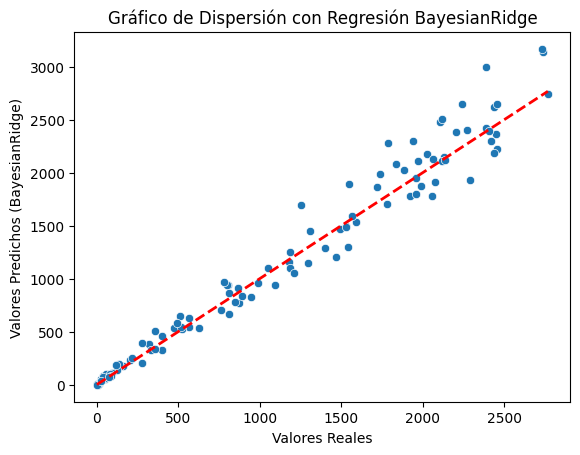

MAE BayesianRidge: 115.9857648137348


In [ ]:
# Crear y entrenar el modelo BayesianRidge
modelo_bayesianridge = BayesianRidge()  # Puedes ajustar los hiperparámetros si es necesario
modelo_bayesianridge.fit(X_train, y_train)

# Hacer predicciones con el modelo BayesianRidge
y_pred_bayesianridge = modelo_bayesianridge.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_bayesianridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (BayesianRidge)")
plt.title("Gráfico de Dispersión con Regresión BayesianRidge")
plt.show()

# Calcular e imprimir el MAE para el modelo BayesianRidge
mae_bayesianridge = mean_absolute_error(y_test, y_pred_bayesianridge)
print(f"MAE BayesianRidge: {mae_bayesianridge}")

In [ ]:

# Crear el modelo BayesianRidge
modelo_bayesianridge = BayesianRidge()

# Definir el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada y obtener los puntajes MAE
scores = cross_val_score(modelo_bayesianridge, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_BayesianRidge = -scores

# Imprimir los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_BayesianRidge)

# Calcular e imprimir el MAE promedio
mae_promedio_BayesianRidge = mae_scores_BayesianRidge.mean()
print(f"MAE promedio Bayesian Ridge (5 folds): {mae_promedio_BayesianRidge}")

Puntajes MAE para cada fold: [115.98576481 118.99814717 101.15302926 109.8701247   96.96222304]
MAE promedio Bayesian Ridge (5 folds): 108.59385779554809


In [ ]:
# Define el modelo BayesianRidge
modelo_bayesianridge = BayesianRidge()

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_bayesianridge = {}
for metric_name, scoring in scoring_metrics.items():
    scores_bayesianridge = cross_val_score(modelo_bayesianridge, X, y, scoring=scoring, cv=cv)
    results_bayesianridge[metric_name] = scores_bayesianridge

# Procesa los resultados
mse_scores_bayesianridge = -results_bayesianridge['neg_mean_squared_error']  # Convertir a positivo
r2_scores_bayesianridge = results_bayesianridge['r2']
mape_scores_bayesianridge = -results_bayesianridge['neg_mean_absolute_percentage_error'] # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (BayesianRidge):", mse_scores_bayesianridge)
print("MSE promedio (BayesianRidge):", mse_scores_bayesianridge.mean())
print("Desviación estándar del MSE (BayesianRidge):", mse_scores_bayesianridge.std())

print("\nPuntajes R2 para cada fold (BayesianRidge):", r2_scores_bayesianridge)
print("R2 promedio (BayesianRidge):", r2_scores_bayesianridge.mean())

print("\nPuntajes MAPE para cada fold (BayesianRidge):", mape_scores_bayesianridge)
print("MAPE promedio (BayesianRidge):", mape_scores_bayesianridge.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_bayesianridge.fit(X_train, y_train)
y_pred_bayesianridge = modelo_bayesianridge.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_bayesianridge = mean_absolute_error(y_test, y_pred_bayesianridge)
mse_test_bayesianridge = mean_squared_error(y_test, y_pred_bayesianridge)
r2_test_bayesianridge = r2_score(y_test, y_pred_bayesianridge)
mape_test_bayesianridge = mean_absolute_percentage_error(y_test, y_pred_bayesianridge)

print("\n--- Datos de prueba (BayesianRidge) ---")
print("MAE (BayesianRidge):", mae_test_bayesianridge)
print("MSE (BayesianRidge):", mse_test_bayesianridge)
print("R2 (BayesianRidge):", r2_test_bayesianridge)
print("MAPE (BayesianRidge):", mape_test_bayesianridge)

Puntajes MSE para cada fold (BayesianRidge): [28983.33966661 27736.73980438 22092.67372041 29689.52531621
 21745.84799222]
MSE promedio (BayesianRidge): 26049.625299966126
Desviación estándar del MSE (BayesianRidge): 3431.6722565534983

Puntajes R2 para cada fold (BayesianRidge): [0.96146719 0.96010431 0.96251648 0.95909007 0.96588661]
R2 promedio (BayesianRidge): 0.9618129325391095

Puntajes MAPE para cada fold (BayesianRidge): [0.22768469 0.19634229 0.15595411 0.20528349 0.34927647]
MAPE promedio (BayesianRidge): 0.2269082106197884

--- Datos de prueba (BayesianRidge) ---
MAE (BayesianRidge): 115.9857648137348
MSE (BayesianRidge): 28983.33966661165
R2 (BayesianRidge): 0.9614671904071153
MAPE (BayesianRidge): 0.22768469253437537


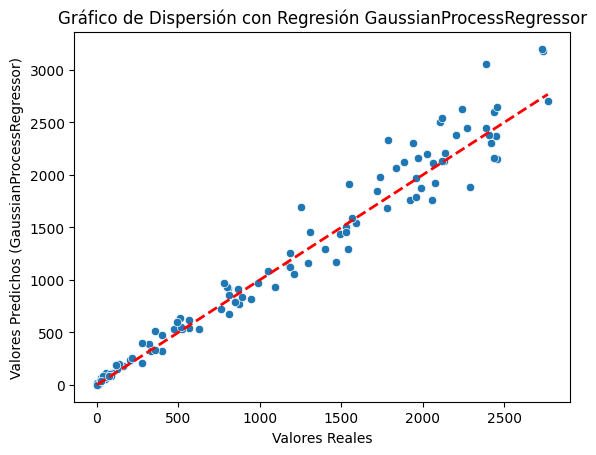

MAE GaussianProcessRegressor: 124.1738064754288


In [ ]:
# Crear y entrenar el modelo GaussianProcessRegressor
kernel = DotProduct() + WhiteKernel()  # Puedes ajustar el kernel y sus parámetros
modelo_gpr = GaussianProcessRegressor(kernel= kernel, random_state=0)
modelo_gpr.fit(X_train, y_train)

# Hacer predicciones con el modelo GaussianProcessRegressor
y_pred_gpr, sigma = modelo_gpr.predict(X_test, return_std=True)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_gpr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (GaussianProcessRegressor)")
plt.title("Gráfico de Dispersión con Regresión GaussianProcessRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo GaussianProcessRegressor
mae_gpr = mean_absolute_error(y_test, y_pred_gpr)
print(f"MAE GaussianProcessRegressor: {mae_gpr}")

In [ ]:

# Define el kernel para el GaussianProcessRegressor
kernel = DotProduct() + WhiteKernel()

# Crea el modelo GaussianProcessRegressor
modelo_gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y obtén los puntajes MAE
scores = cross_val_score(modelo_gpr, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_GaussianProcess = -scores

# Imprime los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_GaussianProcess)

# Calcula e imprime el MAE promedio
mae_promedio_GaussianProcess = mae_scores_GaussianProcess.mean()
print(f"MAE promedio Gaussian Process (5 folds): {mae_promedio_GaussianProcess}")

Puntajes MAE para cada fold: [124.17380648 121.23694945 103.95274863 113.41868585 102.68388383]
MAE promedio Gaussian Process (5 folds): 113.09321484696179


In [ ]:
# Define el kernel para el GaussianProcessRegressor
kernel = DotProduct() + WhiteKernel()

# Crea el modelo GaussianProcessRegressor
modelo_gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_gpr = {}
for metric_name, scoring in scoring_metrics.items():
    scores_gpr = cross_val_score(modelo_gpr, X, y, scoring=scoring, cv=cv)
    results_gpr[metric_name] = scores_gpr

# Procesa los resultados
mse_scores_gpr = -results_gpr['neg_mean_squared_error']  # Convertir a positivo
r2_scores_gpr = results_gpr['r2']
mape_scores_gpr = -results_gpr['neg_mean_absolute_percentage_error']  # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (GaussianProcessRegressor):", mse_scores_gpr)
print("MSE promedio (GaussianProcessRegressor):", mse_scores_gpr.mean())
print("Desviación estándar del MSE (GaussianProcessRegressor):", mse_scores_gpr.std())

print("\nPuntajes R2 para cada fold (GaussianProcessRegressor):", r2_scores_gpr)
print("R2 promedio (GaussianProcessRegressor):", r2_scores_gpr.mean())

print("\nPuntajes MAPE para cada fold (GaussianProcessRegressor):", mape_scores_gpr)
print("MAPE promedio (GaussianProcessRegressor):", mape_scores_gpr.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_gpr.fit(X_train, y_train)
y_pred_gpr = modelo_gpr.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_gpr = mean_absolute_error(y_test, y_pred_gpr)
mse_test_gpr = mean_squared_error(y_test, y_pred_gpr)
r2_test_gpr = r2_score(y_test, y_pred_gpr)
mape_test_gpr = mean_absolute_percentage_error(y_test, y_pred_gpr)

print("\n--- Datos de prueba (GaussianProcessRegressor) ---")
print("MAE (GaussianProcessRegressor):", mae_test_gpr)
print("MSE (GaussianProcessRegressor):", mse_test_gpr)
print("R2 (GaussianProcessRegressor):", r2_test_gpr)
print("MAPE (GaussianProcessRegressor):", mape_test_gpr)

Puntajes MSE para cada fold (GaussianProcessRegressor): [32985.02661333 30179.51397866 22104.69527541 30976.54878533
 21913.82153181]
MSE promedio (GaussianProcessRegressor): 27631.92123690847
Desviación estándar del MSE (GaussianProcessRegressor): 4681.439745494005

Puntajes R2 para cada fold (GaussianProcessRegressor): [0.95614702 0.9565907  0.96249608 0.95731665 0.9656231 ]
R2 promedio (GaussianProcessRegressor): 0.9596347117971609

Puntajes MAPE para cada fold (GaussianProcessRegressor): [0.25355597 0.21772937 0.17299656 0.20749926 0.45390743]
MAPE promedio (GaussianProcessRegressor): 0.26113771696608346

--- Datos de prueba (GaussianProcessRegressor) ---
MAE (GaussianProcessRegressor): 124.1738064754288
MSE (GaussianProcessRegressor): 32985.0266134984
R2 (GaussianProcessRegressor): 0.9561470222364212
MAPE (GaussianProcessRegressor): 0.25355596903395333


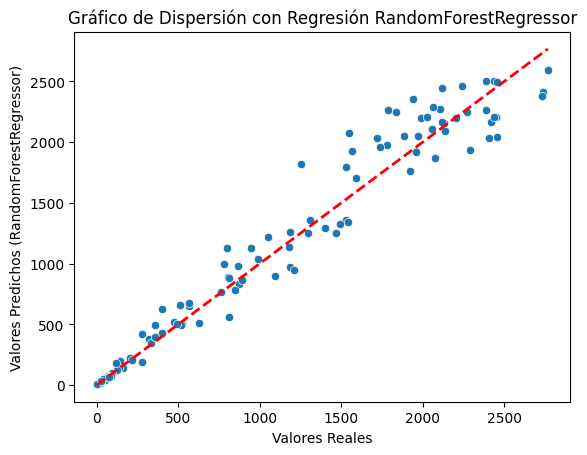

MAE RandomForestRegressor: 129.97496296296296


In [ ]:
# Crear y entrenar el modelo RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros
modelo_rf.fit(X_train, y_train)

# Hacer predicciones con el modelo RandomForestRegressor
y_pred_rf = modelo_rf.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (RandomForestRegressor)")
plt.title("Gráfico de Dispersión con Regresión RandomForestRegressor")
plt.show()

# Calcular e imprimir el MAE para el modelo RandomForestRegressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE RandomForestRegressor: {mae_rf}")

In [ ]:
# Define el modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y obtén los puntajes MAE
scores = cross_val_score(modelo_rf, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores_RandomForest = -scores

# Imprime los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores_RandomForest)

# Calcula e imprime el MAE promedio
mae_promedio_RandomForest = mae_scores_RandomForest.mean()
print(f"MAE promedio Random Forest (5 folds): {mae_promedio_RandomForest}")

Puntajes MAE para cada fold: [128.69794444 129.53437963 108.74062963 122.53063889  97.60103738]
MAE promedio Random Forest (5 folds): 117.42092599515406


In [ ]:
# Define el modelo RandomForestRegressor con los parámetros especificados
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_rf = {}
for metric_name, scoring in scoring_metrics.items():
    scores_rf = cross_val_score(modelo_rf, X, y, scoring=scoring, cv=cv)
    results_rf[metric_name] = scores_rf

# Procesa los resultados
mse_scores_rf = -results_rf['neg_mean_squared_error']  # Convertir a positivo
r2_scores_rf = results_rf['r2']
mape_scores_rf = -results_rf['neg_mean_absolute_percentage_error']  # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (RandomForestRegressor):", mse_scores_rf)
print("MSE promedio (RandomForestRegressor):", mse_scores_rf.mean())
print("Desviación estándar del MSE (RandomForestRegressor):", mse_scores_rf.std())

print("\nPuntajes R2 para cada fold (RandomForestRegressor):", r2_scores_rf)
print("R2 promedio (RandomForestRegressor):", r2_scores_rf.mean())

print("\nPuntajes MAPE para cada fold (RandomForestRegressor):", mape_scores_rf)
print("MAPE promedio (RandomForestRegressor):", mape_scores_rf.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)
mape_test_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("\n--- Datos de prueba (RandomForestRegressor) ---")
print("MAE (RandomForestRegressor):", mae_test_rf)
print("MSE (RandomForestRegressor):", mse_test_rf)
print("R2 (RandomForestRegressor):", r2_test_rf)
print("MAPE (RandomForestRegressor):", mape_test_rf)

Puntajes MSE para cada fold (RandomForestRegressor): [33445.62283328 36440.07192555 21087.24719519 32961.92440529
 19859.50522347]
MSE promedio (RandomForestRegressor): 28758.874316552723
Desviación estándar del MSE (RandomForestRegressor): 6880.184174280636

Puntajes R2 para cada fold (RandomForestRegressor): [0.95553467 0.9475857  0.96422233 0.95458095 0.96884577]
R2 promedio (RandomForestRegressor): 0.958153886488241

Puntajes MAPE para cada fold (RandomForestRegressor): [0.19788389 0.14566011 0.14840571 0.14460351 0.1593283 ]
MAPE promedio (RandomForestRegressor): 0.15917630438917718

--- Datos de prueba (RandomForestRegressor) ---
MAE (RandomForestRegressor): 129.97496296296296
MSE (RandomForestRegressor): 34171.4187878889
R2 (RandomForestRegressor): 0.9545697359649243
MAPE (RandomForestRegressor): 0.19656649425677028


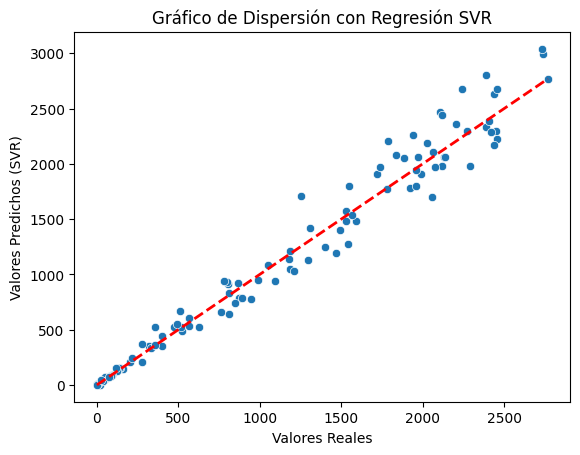

MAE SVR: 109.80828222837395


In [ ]:
# Crear y entrenar el modelo SVR
modelo_svr = SVR(kernel='linear')  # Puedes ajustar el kernel, C, epsilon, etc.
modelo_svr.fit(X_train, y_train)

# Hacer predicciones con el modelo SVR
y_pred_svr = modelo_svr.predict(X_test)

# Visualizar las predicciones (gráfico de dispersión)
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos (SVR)")
plt.title("Gráfico de Dispersión con Regresión SVR")
plt.show()

# Calcular e imprimir el MAE para el modelo SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"MAE SVR: {mae_svr}")

In [ ]:

# Define el modelo SVR
modelo_svr = SVR(kernel='linear')

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada y obtén los puntajes MAE
scores = cross_val_score(modelo_svr, X, y, scoring='neg_mean_absolute_error', cv=cv)

# Los puntajes son negativos, así que los convertimos a positivos
mae_scores = -scores

# Imprime los puntajes MAE para cada fold
print("Puntajes MAE para cada fold:", mae_scores)

# Calcula e imprime el MAE promedio
mae_promedio = mae_scores.mean()
print(f"MAE promedio (5 folds): {mae_promedio}")

Puntajes MAE para cada fold: [109.80898692 116.50497161  96.07893513 109.2129695   97.16486781]
MAE promedio (5 folds): 105.7541461917973


In [ ]:
# Define el modelo SVR con kernel='linear'
modelo_svr = SVR(kernel='linear')

# Define el esquema de validación cruzada (KFold con 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcula las métricas usando cross_val_score
scoring_metrics = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
}

results_svr = {}
for metric_name, scoring in scoring_metrics.items():
    scores_svr = cross_val_score(modelo_svr, X, y, scoring=scoring, cv=cv)
    results_svr[metric_name] = scores_svr

# Procesa los resultados
mse_scores_svr = -results_svr['neg_mean_squared_error']  # Convertir a positivo
r2_scores_svr = results_svr['r2']
mape_scores_svr = -results_svr['neg_mean_absolute_percentage_error']  # Convertir a positivo

# Imprime los resultados
print("Puntajes MSE para cada fold (SVR):", mse_scores_svr)
print("MSE promedio (SVR):", mse_scores_svr.mean())
print("Desviación estándar del MSE (SVR):", mse_scores_svr.std())

print("\nPuntajes R2 para cada fold (SVR):", r2_scores_svr)
print("R2 promedio (SVR):", r2_scores_svr.mean())

print("\nPuntajes MAPE para cada fold (SVR):", mape_scores_svr)
print("MAPE promedio (SVR):", mape_scores_svr.mean())

# --- Evaluación en los datos de prueba ---
# (Asumiendo que tienes X_train, X_test, y_train, y_test)

modelo_svr.fit(X_train, y_train)
y_pred_svr = modelo_svr.predict(X_test)

# Calcula las métricas en los datos de prueba
mae_test_svr = mean_absolute_error(y_test, y_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_svr)
r2_test_svr = r2_score(y_test, y_pred_svr)
mape_test_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print("\n--- Datos de prueba (SVR) ---")
print("MAE (SVR):", mae_test_svr)
print("MSE (SVR):", mse_test_svr)
print("R2 (SVR):", r2_test_svr)
print("MAPE (SVR):", mape_test_svr)

Puntajes MSE para cada fold (SVR): [24860.85280315 27805.4743588  20125.20571376 29777.78222511
 21546.73226136]
MSE promedio (SVR): 24823.20947243665
Desviación estándar del MSE (SVR): 3640.045446573608

Puntajes R2 para cada fold (SVR): [0.96694796 0.96000545 0.96585458 0.95896846 0.96619897]
R2 promedio (SVR): 0.9635950835018189

Puntajes MAPE para cada fold (SVR): [0.17498957 0.12737837 0.12533323 0.13726552 0.16991878]
MAPE promedio (SVR): 0.1469770937411486

--- Datos de prueba (SVR) ---
MAE (SVR): 109.80828222837395
MSE (SVR): 24860.595223531443
R2 (SVR): 0.9669483022614658
MAPE (SVR): 0.17498662947824628


In [ ]:
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error

# ... (código para cargar y preparar los datos) ...

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(KernelRidge(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en los datos de prueba: {mae}")

Mejores hiperparámetros: {'alpha': 10.0, 'gamma': 0.1, 'kernel': 'linear'}
MAE en los datos de prueba: 113.3459423086117


In [ ]:

# ... (código para cargar y preparar los datos) ...

param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en los datos de prueba: {mae}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mejores hiperparámetros: {'alpha': 0.01, 'learning_rate': 'adaptive', 'loss': 'huber', 'penalty': 'l2'}
MAE en los datos de prueba: 130.04383828439708


In [ ]:
param_grid = {
    'kernel': [1.0 * RBF(1.0), 1.0 * Matern(length_scale=1.0, nu=1.5),
               ConstantKernel(1.0) * RBF(1.0),
               ConstantKernel(1.0) + RBF(1.0),
               ConstantKernel(1.0) * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1)],
    'alpha': [1e-10, 1e-5, 1e-1]  # Parámetro de ruido
}

In [ ]:
grid_search = GridSearchCV(
    estimator=GaussianProcessRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Puedes usar otras métricas como 'r2' o 'neg_mean_squared_error'
    cv=5,  # Número de pliegues para la validación cruzada
    n_jobs=-1  # Usar todos los núcleos del procesador para acelerar la búsqueda
)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GridSearchCV(cv=5, estimator=GaussianProcessRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-05, 0.1],
                         'kernel': [1**2 * RBF(length_scale=1),
                                    1**2 * Matern(length_scale=1, nu=1.5),
                                    1**2 * RBF(length_scale=1),
                                    1**2 + RBF(length_scale=1),
                                    1**2 * Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)]},
             scoring='neg_mean_absolute_error')

In [ ]:
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

best_model = grid_search.best_estimator_

Mejores hiperparámetros: {'alpha': 0.1, 'kernel': 1**2 + RBF(length_scale=1)}


In [ ]:
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en los datos de prueba: {mae}")

MAE en los datos de prueba: 774.2292849857223


In [ ]:
print("\n--- Métricas en datos de prueba para todos los modelos ---")
print(" MAE :")
print("MAE validacion cruzada Linear Regresion:", mae_test_cv_LR)
print("MAE (Lasso):", mae_test_lasso)
print("MAE (ElasticNet):", mae_test_elasticnet)
print("MAE (KernelRidge):", mae_test_kernelridge)
print("MAE (SGDRegressor):", mae_test_sgd)
print("MAE (BayesianRidge):", mae_test_bayesianridge)
print("MAE (GaussianProcessRegressor):", mae_test_gpr)
print("MAE (RandomForestRegressor):", mae_test_rf)
print("MAE (SVR):", mae_test_svr)

print(" MSE :")
print("MSE validacion cruzada Linear Regresion:", mse_test_cv_LR)
print("MSE (Lasso):", mse_test_lasso)
print("MSE (ElasticNet):", mse_test_elasticnet)
print("MSE (KernelRidge):", mse_test_kernelridge)
print("MSE (SGDRegressor):", mse_test_sgd)
print("MSE (BayesianRidge):", mse_test_bayesianridge)
print("MSE (GaussianProcessRegressor):", mse_test_gpr)
print("MSE (RandomForestRegressor):", mse_test_rf)
print("MSE (SVR):", mse_test_svr)

print(" R2 :")
print("R2 validacion cruzada Linear Regresion:", r2_test_cv_LR)
print("R2 (Lasso):", r2_test_lasso)
print("R2 (ElasticNet):", r2_test_elasticnet)
print("R2 (KernelRidge):", r2_test_kernelridge)
print("R2 (SGDRegressor):", r2_test_sgd)
print("R2 (BayesianRidge):", r2_test_bayesianridge)
print("R2 (GaussianProcessRegressor):", r2_test_gpr)
print("R2 (RandomForestRegressor):", r2_test_rf)
print("R2 (SVR):", r2_test_svr)

print(" MAPE :")
print("MAPE validacion cruzada Linear Regresion:", mape_test_cv_LR)
print("MAPE (Lasso):", mape_test_lasso)
print("MAPE (ElasticNet):", mape_test_elasticnet)
print("MAPE (KernelRidge):", mape_test_kernelridge)
print("MAPE (SGDRegressor):", mape_test_sgd)
print("MAPE (BayesianRidge):", mape_test_bayesianridge)
print("MAPE (GaussianProcessRegressor):", mape_test_gpr)
print("MAPE (RandomForestRegressor):", mape_test_rf)
print("MAPE (SVR):", mape_test_svr)






--- Métricas en datos de prueba para todos los modelos ---
 MAE :
MAE validacion cruzada Linear Regresion: 774.2292849857223
MAE (Lasso): 113.39772155974212
MAE (ElasticNet): 113.9179888038722
MAE (KernelRidge): 113.3459423086117
MAE (SGDRegressor): 141.6224092194684
MAE (BayesianRidge): 115.9857648137348
MAE (GaussianProcessRegressor): 124.1738064754288
MAE (RandomForestRegressor): 129.97496296296296
MAE (SVR): 109.80828222837395
 MSE :
MSE validacion cruzada Linear Regresion: 755097.5964857772
MSE (Lasso): 26700.162157963667
MSE (ElasticNet): 27777.79347125895
MSE (KernelRidge): 26760.32514351871
MSE (SGDRegressor): 41824.588860359654
MSE (BayesianRidge): 28983.33966661165
MSE (GaussianProcessRegressor): 32985.0266134984
MSE (RandomForestRegressor): 34171.4187878889
MSE (SVR): 24860.595223531443
 R2 :
R2 validacion cruzada Linear Regresion: -0.0038881731407078846
R2 (Lasso): 0.9645026323271794
R2 (ElasticNet): 0.9630699415922889
R2 (KernelRidge): 0.9644226467598294
R2 (SGDRegressor)